# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Name: BHAVANI SAI SHRIYA ANUMALA

UTA ID# : 1001870184

NET ID: bxa0184

**DO NOT DELETE THIS CELL**


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment.If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.
9. Only Seaborn,numpy,pandas,sklearn,matplotlib packages will be allowed. Failing to abide will lead to a **-10 decrement in your scores.**
10. All visualizations (including scatter plots) should have at least 4-5 meaningful lines explaining about it. Failure to do so, will lead to reduction in marks.


## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


You have 3 dataset files . 
You need to submit this ipython file after renaming it. 
Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [3]:
#########################begin code for Task 1-a

## Describe which is the optimal value for K and explain why you choose it as the optimal value

df = pd.read_csv('College.csv')
df.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [4]:
df.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [6]:
#from the above results leave aside numerical values but for object values we need to quantify that column
#Quantifing the first column
pd.factorize (df.iloc[:, 0])
df.iloc[:, 0], Unique = pd.factorize (df.iloc[:, 0] )

In [7]:
#Quantifing Private column
le = LabelEncoder()
Private = le.fit_transform(df.Private)
df["Private"] = Private

In [8]:
df.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,5,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,6,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,7,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,8,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,9,1,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [9]:
#some attributes are larger than the others, so scale using MinMaxScaler so they are in same range.

from sklearn import preprocessing
columns = df.columns
values = df.values
Scaler = preprocessing.MinMaxScaler()
tempScaled = Scaler.fit_transform(values)
temp1 = pd.DataFrame(tempScaled,columns=columns)


In [10]:

## Describe which is the optimal value for K and explain why you choose it as the optimal value

SSE = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='random',random_state=0)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

C:\Users\shriy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


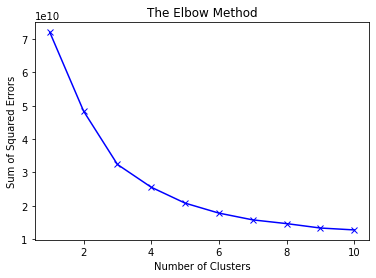

The optimal k value is 9 as the SSE tends to 0 from k=9


In [20]:
plt.plot(range(1,11),SSE,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()
print("The optimal k value is 9 as the SSE tends to 0 from k=9")

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2,3,4 and visualize the predicted training samples and actual training samples on scatter plots. Use 80% of the dataset for training and 20% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [24]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail

### Important!!!
X_train = df.sample(frac=0.80, random_state=2021)
X_test = df.drop(X_train.index)
y_train = X_train.pop('Private')
y_test = X_test.pop('Private')
###################end code for Task 1-b-1

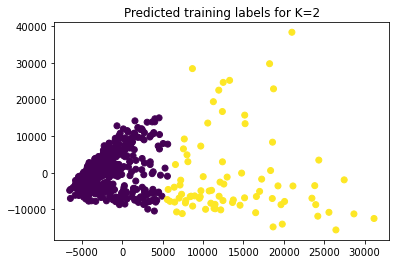

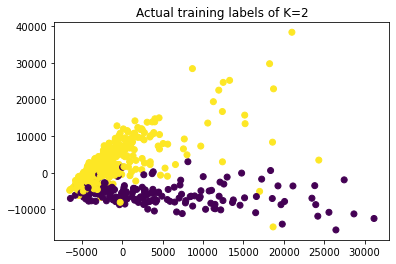

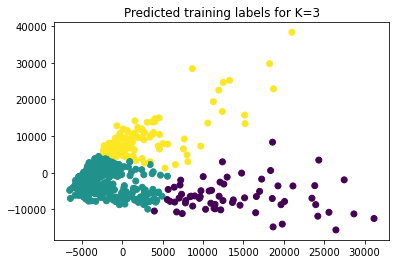

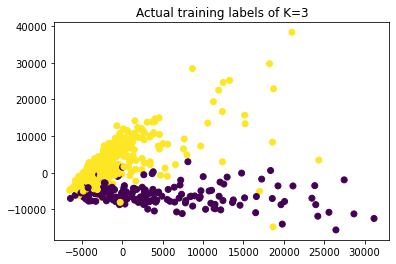

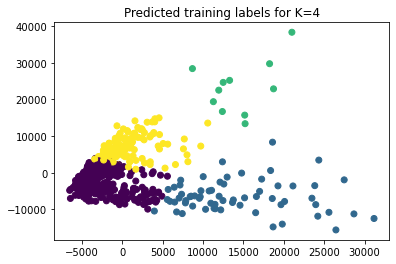

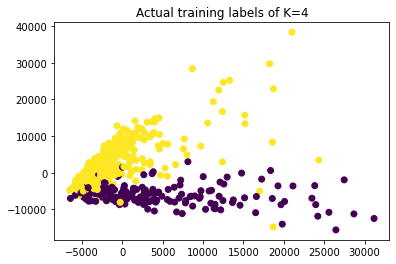

In [13]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA

for k in [2,3,4]:
  # Create the KMeans model
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(X_train)

  # Compute cluster centers and predict cluster index for each sample 
  index = kmeans.predict(X_train)

  # Model and fit the data to the PCA model
  X_train_pca = PCA(n_components=2).fit_transform(X_train)

  # Visualize the predicted training labels vs actual training labels. 
  ### scatter(x, y, your_data)
  x = X_train_pca[:, 0]
  y = X_train_pca[:, 1]


  ## Visualize using K=2,3,4 as well
  x = X_train_pca[:, 0]
  y = X_train_pca[:, 1]
  plt.title("Predicted training labels for K=%d" %k)
  plt.scatter(x,y,c = index)
  plt.show()
  plt.title("Actual training labels of K=%d" %k)
  plt.scatter(x,y,c = y_train)
  plt.show()  

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

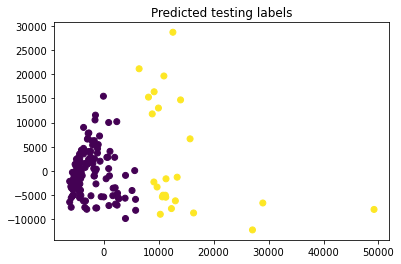

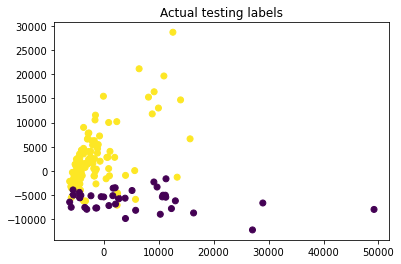

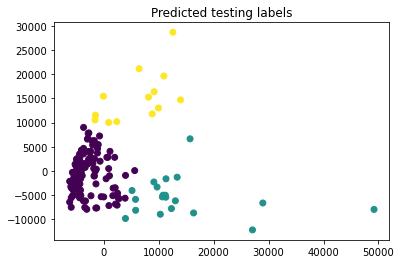

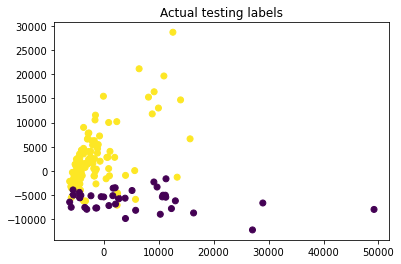

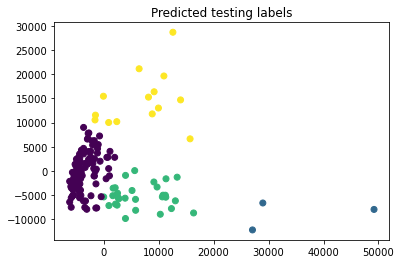

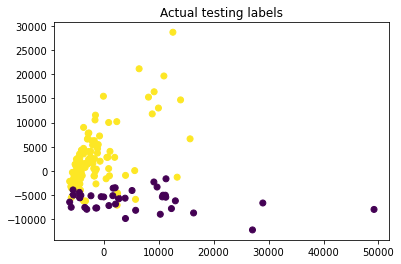

In [14]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

for k in [2,3,4]:
  # predict cluster index for each sample 
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X_test)

  # predict cluster index for each sample 
  C_index = kmeans.predict(X_test)
  # Model and fit the data to the PCA model
  X_test_pca = PCA(n_components=2).fit_transform(X_test)

  # Visualize the predicted testing labels vs actual testing labels. 
  ### scatter(x, y, your_data)
  x = X_test_pca[:, 0]
  y = X_test_pca[:, 1]
  plt.title("Predicted testing labels")
  plt.scatter(x,y,c = C_index)
  plt.show()
  plt.title("Actual testing labels")
  plt.scatter(x,y,c = y_test)
  plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a 2D confusion matrix.

In [15]:
###################begin code for Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above
for k in [2,3,4]:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
  kmeans_t = KMeans(n_clusters=k, random_state=0).fit(X_test)
  index = kmeans.predict(X_train)
  C_index = kmeans_t.predict(X_test)
  print("Confusion matrix for training data with K=%d \n" %k ,confusion_matrix(y_train,index))
  print("Confusion matrix for testing data with K=%d \n" %k ,confusion_matrix(y_test,C_index))
###################end code for Task 1-b-4

Confusion matrix for training data with K=2 
 [[112  59]
 [429  22]]
Confusion matrix for testing data with K=2 
 [[ 27  14]
 [104  10]]
Confusion matrix for training data with K=3 
 [[111   1  59]
 [334 112   5]
 [  0   0   0]]
Confusion matrix for testing data with K=3 
 [[24 17  0]
 [98  3 13]
 [ 0  0  0]]
Confusion matrix for training data with K=4 
 [[110  59   0   2]
 [309   5  11 126]
 [  0   0   0   0]
 [  0   0   0   0]]
Confusion matrix for testing data with K=4 
 [[15  3 23  0]
 [94  0  6 14]
 [ 0  0  0  0]
 [ 0  0  0  0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [16]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
PDM_train = X_train
cosine_distance = pairwise_distances(PDM_train,metric='cosine')
euclidean_distance = pairwise_distances(PDM_train,metric='euclidean')
manhattan_distance = pairwise_distances(PDM_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cosine_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cosine_comp_f1 = f1_score(y_train,cosine_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euclid_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euclid_comp_f1 = f1_score(y_train,euclid_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
manhattan_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_comp_f1 = f1_score(y_train,manhattan_comp)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cosine_avg_f1 = f1_score(y_train,cosine_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euclid_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euclid_avg_f1 = f1_score(y_train,euclid_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_avg_f1 = f1_score(y_train,manhattan_avg)

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 

print("F1-score for complete linkage + cosine", cosine_comp_f1)
print("F1-score for complete linkage + euclidean", euclid_comp_f1)
print("F1-score for complete linkage + manhattan", manhattan_comp_f1)
print("F1-score for average linkage + cosine", cosine_avg_f1)
print("F1-score for average linkage + euclidean", euclid_avg_f1)
print("F1-score for average linkage + manhattan", manhattan_avg_f1)

###################end code for Task 2-a


F1-score for complete linkage + cosine 0.014732965009208104
F1-score for complete linkage + euclidean 0.03056768558951965
F1-score for complete linkage + manhattan 0.5431309904153354
F1-score for average linkage + cosine 0.9141104294478527
F1-score for average linkage + euclidean 0.05183585313174946
F1-score for average linkage + manhattan 0.017582417582417582


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

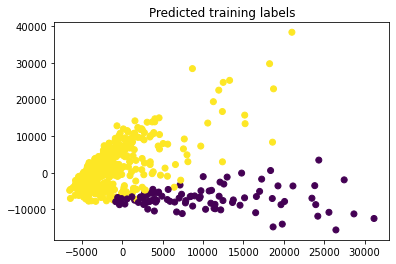

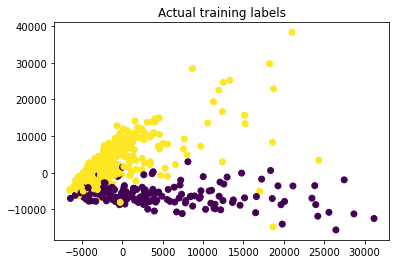

In [17]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
models = {'cos_comp':cosine_comp_f1,'euc_comp':euclid_comp_f1,'man_comp':manhattan_comp_f1,'cos_avg':cosine_avg_f1,'euc_avg':euclid_avg_f1,'man_avg':manhattan_avg_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cos_comp':
    best_model = cosine_comp

elif best_model_val == 'euc_comp':
    best_model = euclid_comp

elif best_model_val == 'man_comp':
    best_model = manhattan_comp

elif best_model_val == 'cos_avg':
    best_model = cosine_avg

elif best_model_val == 'euc_avg':
    best_model = euclid_avg

elif best_model_val == 'man_avg':
    best_model = manhattan_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Predicted training labels")
plt.show()
plt.scatter(x,y,c=y_train)
plt.title("Actual training labels")
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

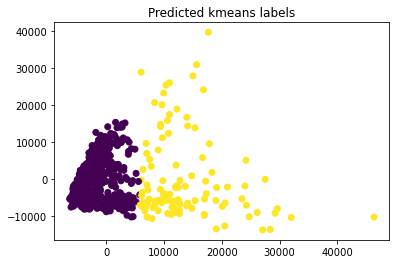

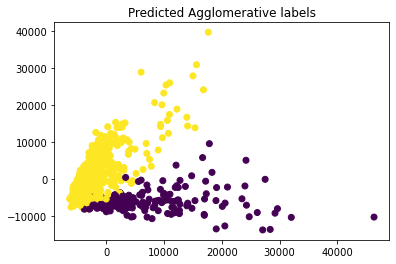

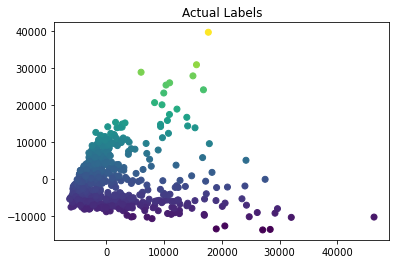

In [18]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

kmeans_data = KMeans(n_clusters=2,random_state=0)
kmeans_data_fit = kmeans_data.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
cosine_distance = pairwise_distances(X,metric='cosine')
euclidean_distance = pairwise_distances(X,metric='euclidean')
manhattan_distance = pairwise_distances(X,metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cosine_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
cosine_comp_f1 = f1_score(y,cosine_comp, average='weighted')
euclid_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
euclid_comp_f1 = f1_score(y,euclid_comp, average='weighted')
manhattan_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_comp_f1 = f1_score(y,manhattan_comp,  average='weighted')
cosine_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
cosine_avg_f1 = f1_score(y,cosine_avg,  average='weighted')
euclid_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
euclid_avg_f1 = f1_score(y,euclid_avg,  average='weighted')
manhattan_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
manhattan_avg_f1 = f1_score(y,manhattan_avg,  average='weighted')
models = {'cosine_comp':cosine_comp_f1,'euclid_comp':euclid_comp_f1,'manhattan_comp':manhattan_comp_f1,'cosine_avg':cosine_avg_f1,'euclid_avg':euclid_avg_f1,'manhattan_avg':manhattan_avg_f1}
best_model_val = max(models,key=models.get)
if best_model_val == 'cosine_comp':
    best_model = cosine_comp
elif best_model_val == 'euclid_comp':
    best_model = euclid_comp
elif best_model_val == 'manhattan_comp':
    best_model = manhattan_comp
elif best_model_val == 'cosine_avg':
    best_model = cosine_avg   
elif best_model_val == 'euclid_avg':
    best_model = euclid_avg
elif best_model_val == 'manhattan_avg':
    best_model = manhattan_avg
else:
    best_model = None

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.scatter(x,y,c=kmeans_data_fit)
plt.title("Predicted kmeans labels")
plt.show()
plt.scatter(x,y,c=best_model)
plt.title("Predicted Agglomerative labels")
plt.show()
plt.title("Actual Labels")
plt.scatter(x,y,c=y)#actual
plt.show()

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

In [19]:
###################begin code for Task 3-b

X = df.loc[:, df.columns != "Private"]
y = df["Private"]
print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y,kmeans_data_fit)
agglo_conf = confusion_matrix(y,best_model)
print("Kmeans:")
print(kmeans_conf)
print("Agglomerative:")
print(agglo_conf)
print("\nPrecision\n")
kmeans_prec = precision_score(y,kmeans_data_fit)
agglo_prec = precision_score(y,best_model)
print("Kmeans:")
print(kmeans_prec)
print("Agglomerative:")
print(agglo_prec)
print("\nRecall\n")
kmeans_recall = recall_score(y,kmeans_data_fit)
agglo_recall = recall_score(y,best_model)
print("Kmeans:")
print(kmeans_recall)
print("Agglomerative:")
print(agglo_recall)
print("\nF1 Score\n")
kmeans_score = f1_score(y,kmeans_data_fit)
agglo_score = f1_score(y,best_model)
print("Kmeans:")
print(kmeans_score)
print("Agglomerative:")
print(agglo_score)
print("Accuracy of kmeans:",metrics.accuracy_score(y,kmeans_data_fit))
print("Accuracy of agglomerative :",metrics.accuracy_score(y,best_model))

###################end code for Task 3-b

Confusion matrix

Kmeans:
[[138  74]
 [531  34]]
Agglomerative:
[[147  65]
 [ 14 551]]

Precision

Kmeans:
0.3148148148148148
Agglomerative:
0.8944805194805194

Recall

Kmeans:
0.06017699115044248
Agglomerative:
0.9752212389380531

F1 Score

Kmeans:
0.10104011887072809
Agglomerative:
0.9331075359864521
Accuracy of kmeans: 0.22136422136422138
Accuracy of agglomerative : 0.8983268983268984


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a 2D confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[10 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points